<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 3.4

Logistic regression models probability of a binary dependent variable outcome with a logit function derived from a linear combination of variables using regression. It is the most commonly used model for probability of binary outcomes in statistics. Using a different property of the logit curve, logistic regression is also commonly used for classification problems due to the logit function quickly approaching 1 from the left and 0 from the right when starting from a probability anywhere between 0 and 1, so data points with binary outcomes can be grouped accordingly according to feature weights that predict those outcomes. It is similar to regularized least-squares and support vector machine, but logistic regression uses the log-loss function to minimize error, while regularized least-squares uses the square-loss and support vector machine uses hinge-loss. Feature weights are obtained by maximizing the log-likelihood function that most closely produces the observed data.

Example 1 uses a dataset to predict heart disease outcomes in patients over a 10-year span from the time of the survey.

Dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

In [63]:
# Example 1: Initial Model with Heart Disease

In [64]:
import pandas as pd # for dataframes
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV # for training and hyperparameter tuning
from sklearn.metrics import confusion_matrix, accuracy_score # for evaluation
from sklearn.preprocessing import StandardScaler # for model improvement via feature scaling
import matplotlib.pyplot as plt # for visualization and interpretability

In [65]:
hd_df = pd.read_csv('framingham.csv') # dataset of heart disease presence over 10 years
hd_df.head() # see feature and outcome representation

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


[[ 0.50053295  0.06443215 -0.04468861  0.03117629  0.01677808  0.08635957
   0.71614815  0.19431597  0.08612851  0.00261974  0.0152528  -0.00595684
   0.02139408 -0.00533536  0.00705759]]
Accuracy: 0.8743169398907104
[[628   3]
 [ 89  12]]


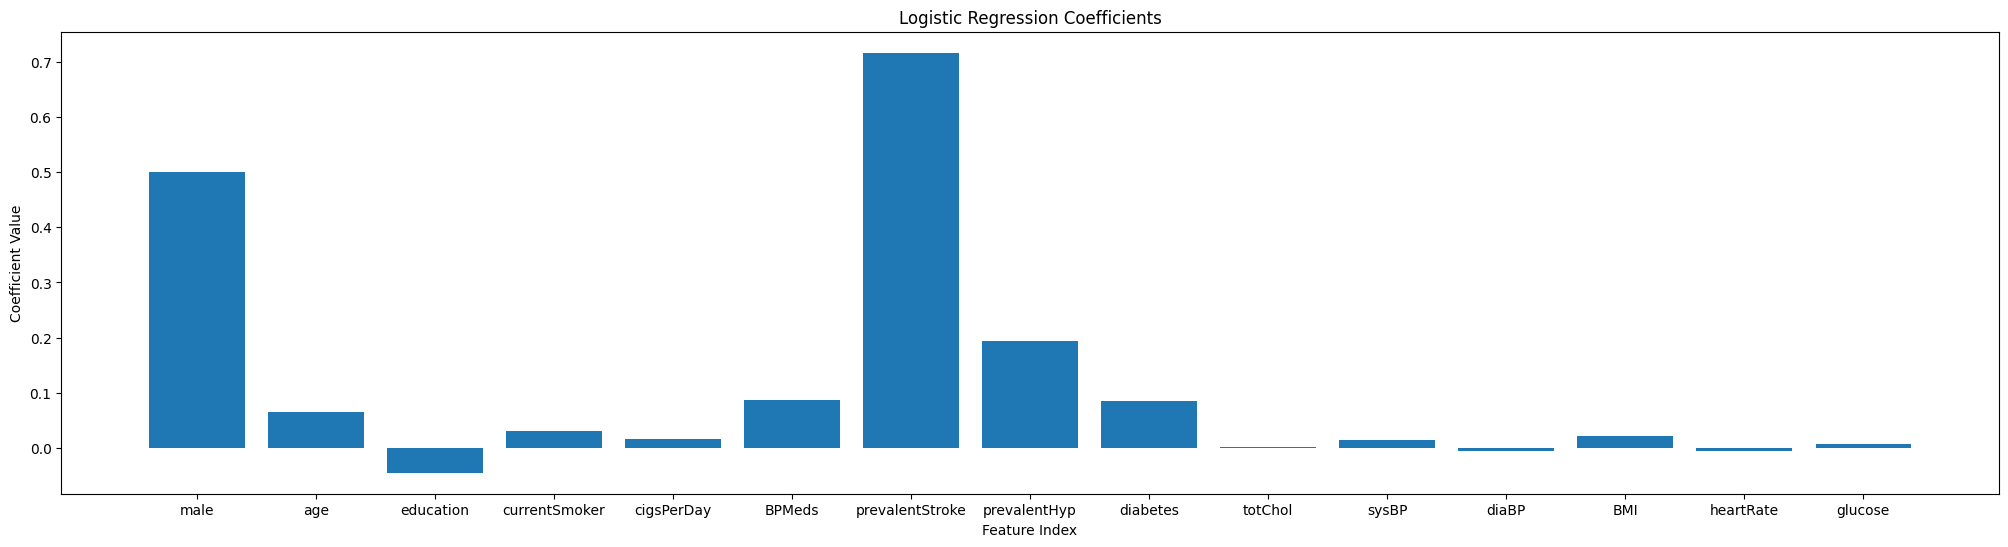

In [66]:
hd_df.dropna(inplace=True) # drop missing values, could create bias in model where people may not prefer to answer certain questions

X = hd_df.drop('TenYearCHD', axis=1) # features
y = hd_df['TenYearCHD'] # outcomes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # 80/20 train/test split

model = LogisticRegression(max_iter = 10000) # initialize model, high number of minimum iterations was required
model.fit(X_train, y_train) # fit logit curve to data

y_pred = model.predict(X_test) # predictions

coef = model.coef_ # feature weights
print(coef)

accuracy = accuracy_score(y_test, y_pred) # accuracy evaluation
print(f"Accuracy: {accuracy}")

print(confusion_matrix(y_test, y_pred)) # identify weaknesses of model

plt.figure(figsize=(25, 6))

plt.bar(X.columns.tolist(), coef[0]) # visualize feature weights
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

Example 2 uses StandardScaler to improve the interpretability of the model from Example 1. The results were slightly worse, but the importance of the features can be interpreted better now that they are on the same scale.

[[ 0.25121107  0.54987264 -0.04539563  0.01595068  0.19875972  0.01374367
   0.068302    0.09094822  0.01297486  0.11610572  0.33480941 -0.07042359
   0.0864178  -0.06313376  0.16943002]]
Accuracy: 0.8729508196721312
[[627   4]
 [ 89  12]]


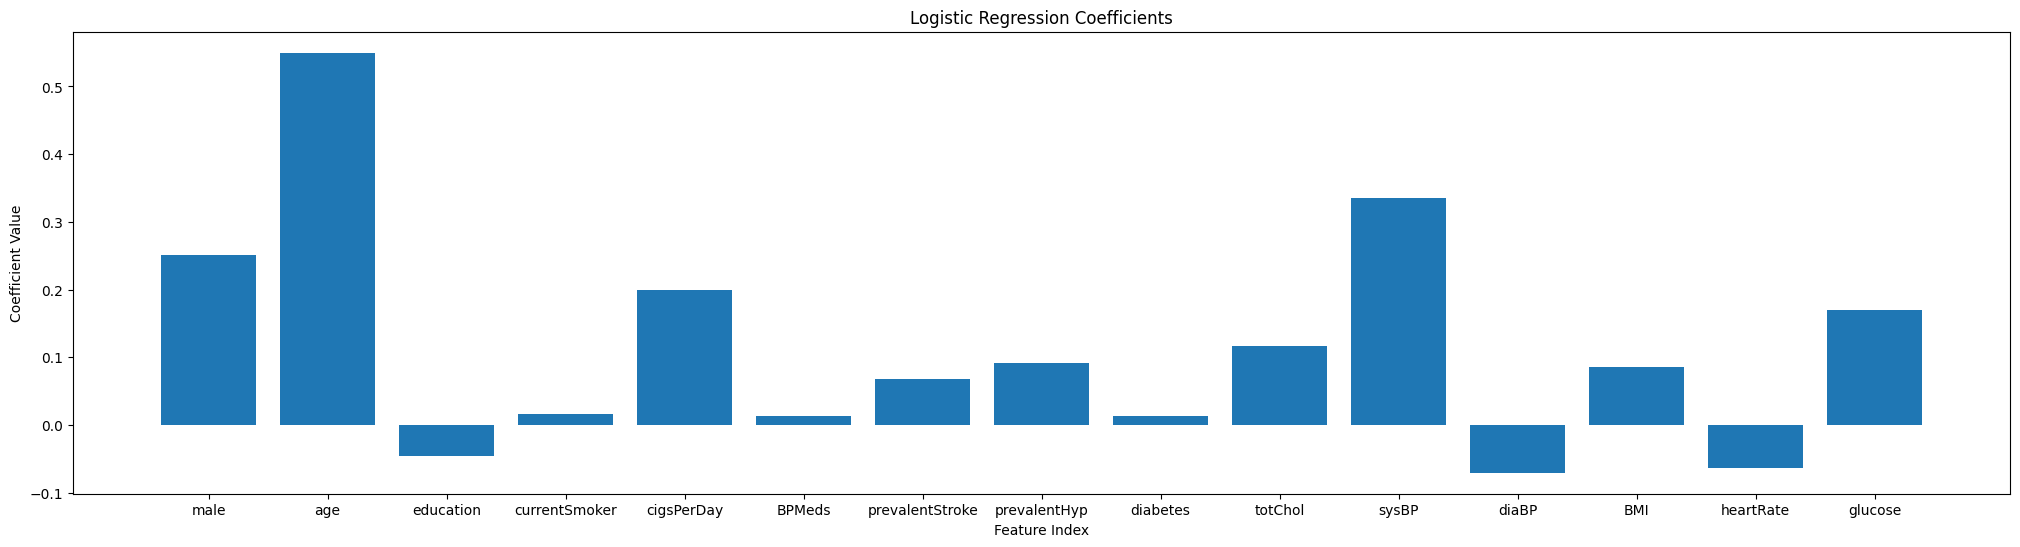

In [67]:
# Example 2: With StandardScaler

scaler = StandardScaler() # scale features for better comparison of weights (feature importance interpretability)
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

coef = model.coef_
print(coef)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(25, 6))

plt.bar(X.columns.tolist(), coef[0])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

The confusion matrix of both examples shows that despite the high accuracy, the model struggles heavily with predicting someone to not have heart disease. Given how strongly important sex and age are according to the model, the model's accuracy could be improved by individualizing the model to different demographics, a technique that makes sense in a medical context. Different random_states also produced different accuracies. The dataset author's model reached 0.88 accuracy and also saw stronger specificity than sensitivity.